# Introduce Graph-API (G-API)


 ### What is Graph-API (G-API)?
Graph-API is a high-level programming interface that allows for the representation of dependencies and data flow between computational tasks. This interface enables programmers to define complex computational tasks graphically, where nodes represent tasks, and edges represent data dependencies.




### What does G-API do?
G-API addresses limitations of older methods by offering a graph-based model that can automatically organize and optimize tasks. This makes a programmer's job easier and the execution of tasks more efficient.

 ### What's the benefit of using G-API with OpenCV?
 It reduces memory usage, optimizes memory access for cache reuse, automates parallelism, and improves efficiency in graph operations. It also manages data transfers smartly and improves system throughput by pipelining tasks at the frame level.

# Defining graphs
  

### What does Graph mean in Graph-API?
A "**graph**" symbolizes a composition of several layers, with each layer depicting a distinct image  processing operation or algorithm.


### How to build Graphs?
**Graphs** are built by applying operations to data objects. It should be noted that the  API itself has no "**graphs**"; instead, it uses expressions. **Data objects** don't contain actual data; they're more about capturing dependencies. **Operations** use and produce these data objects.
  


### How to define Graphs?
To define a graph, consider which data objects are the inputs and what are the outputs. Again, the API itself doesn't house "graphs" - it works using expressions. 


  Now Let us look two examples:


In the first example, we use **GMat** to process images. We define the G-API computation and then apply this computation on the input image.

In [35]:
%matplotlib inline 
# Import OpenCV.
import cv2 as cv  
import numpy as np  
from matplotlib import pyplot as plt  

In [36]:
def blurring_operation(input_path, output_path):
    """
    This function performs a blurring operation on an image.
    
    Args:
    input_path (str): The path to the input image.
    output_path (str): The path to the output image.
    
    Returns:
    None
    """
    # Load the input image.
    in_mat: cv.Mat = cv.imread(input_path)
    out_mat: cv.Mat = cv.Mat(np.zeros_like(in_mat))


    # Display the input image.
    plt.imshow(cv.cvtColor(in_mat, cv.COLOR_BGR2RGB))
    plt.show()

    # Define the G-API computation (blurring operation).
    g_in: cv.GMat = cv.GMat()
    g_out: cv.GMat = cv.gapi.blur(g_in, (10, 10))
    g_computation: cv.GComputation = cv.GComputation(cv.GIn(g_in), cv.GOut(g_out))

    # Apply the computation to the input image.
    out_mat = g_computation.apply(cv.gin(in_mat))

    # Display the output (blurred) image.
    plt.imshow(cv.cvtColor(out_mat, cv.COLOR_BGR2RGB))
    plt.show()

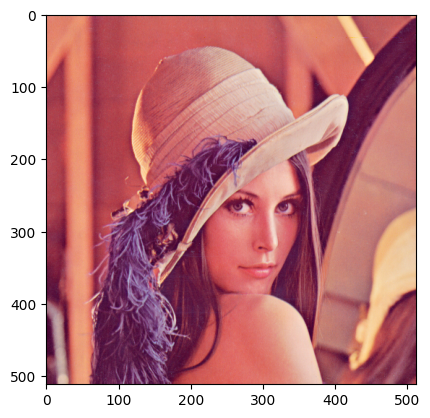

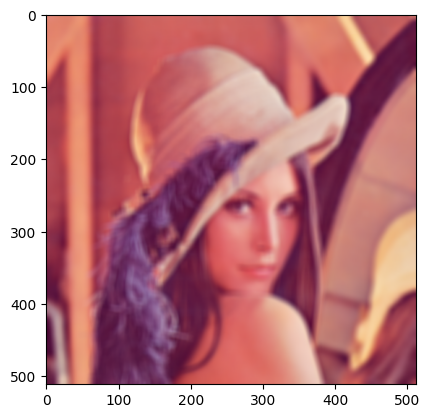

In [37]:
# Call the function with our paths
input_path = "resources/Lenna_(test_image).png"
output_path = "resources/Lenna_(out_image).png"

blurring_operation(input_path, output_path)

Based on the first example, we understand that:

* It's not necessary to have actual data in order to create a graph.


* The process of constructing a graph and executing it are distinct steps.


In many cases, we need to define an operation and kernel. We can refer to the following example for guidance. (For more information on operations and kernels, please refer to Chapter 4).

In [39]:
# GArray and GOpaque
@cv.gapi.op('custom.sum', in_types=[cv.GArray.Int], out_types=[cv.GOpaque.Int])
class GSum:
    """
    Declare a custom G-API operation named 'custom.sum'.
    This operation takes an array of integers as input and returns an integer.
    """
    @staticmethod
    def outMeta(desc: Any):
        """
        Define the output metadata for the operation.
        """
        return desc


@cv.gapi.kernel(GSum)
class GSumImpl:
    
    """
    Define a kernel for the 'custom.sum' operation.
    The kernel is the implementation of the operation.
    """
    @staticmethod
    def run(arr: List[int]):
        """
        Define the run function for the kernel.
        It takes an array of integers as input and returns their sum.
        """
        return sum(arr)

# Define input and output for the G-API computation.
g_in: cv.GArray.Int = cv.GArray.Int()
g_sum: cv.GOpaque.Int = GSum.on(g_in)

# Define the G-API computation.
g_computation: cv.GComputation = cv.GComputation(cv.GIn(g_in), cv.GOut(g_sum))

# Package the kernel.
pkg = cv.gapi.kernels(GSumImpl)

# Apply the G-API computation.
# The input for the computation is the array [1,2,3].
arr: List[int] = [1, 2, 3]
out_sum = g_computation.apply(cv.gin(arr), args=cv.gapi.compile_args(pkg))

# Print the original input 
print("The Input array:", arr) 

# Print the output.
print("The sum of input array:", out_sum)

The Input array: [1, 2, 3]
The sum of input array: 6



Based on the second example, we understand that:

* Graph construction and graph execution are distinct stages. This is shown in our example where we first define the graph computation with **cv.GComputation(cv.GIn(g_in)**, **cv.GOut(g_out))**, and then later execute it with actual data using the **.apply()** method.

* A graph is first expressed and then encapsulated within an object. In our example, **g_computation** is the object that captures our graph.

* The graph constructor sets the protocol, allowing users to pass vectors of inputs/outputs. This is demonstrated with the creation of the **g_computation** object using **cv.GComputation(cv.GIn(g_in)**, **cv.GOut(g_out))**.

